##**DEEP LEARNING ASSIGNMENT 3**

##**LSTM AIRLINE DATASET (PROBLEM 3)**

##**NAME: ALOUKIK ADITYA**

##**STUDENT ID: 1115290**



##**IMPORTING ALL THE LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tools.eval_measures import rmse
from keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from keras.layers import Dropout
import warnings
warnings.filterwarnings("ignore")
import time
from sklearn.metrics import mean_squared_error
import statistics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **READING DATASET**

In [0]:
#data = pd.read_csv('drive/My Drive/Airlines.csv')# reading data here

In [0]:
data = pd.read_csv('Airlines.csv')# reading data here

In [4]:
print(data)#--------------------------------CHECKING DATA

       Month  Passengers
0    1949-01         112
1    1949-02         118
2    1949-03         132
3    1949-04         129
4    1949-05         121
..       ...         ...
139  1960-08         606
140  1960-09         508
141  1960-10         461
142  1960-11         390
143  1960-12         432

[144 rows x 2 columns]


# New Section

In [5]:
data#---------------DATA IS IN PANDAS DATAFRAME

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [0]:

X = data.Passengers#----------------GETTING ONLY PASSENGER DATA HERE STORING IT IN X

In [0]:
X = np.array(X).reshape(-1,1)#-------------------RESHAPING X

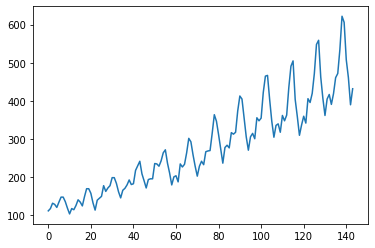

In [8]:
plt.plot(X)#------------------PLOTTING THE VALUES ON GRAPH

In [0]:
Data_scale = MinMaxScaler()#--------------------USING MINMAX SCALER HERE TO GET VALUES BETWEEN 0 AND 1
X = Data_scale.fit_transform(X)

In [0]:
Data = X

In [0]:
Train, Test = train_test_split(Data,test_size=0.7,shuffle=False)#-----------------SPLITTING DATA WITHOUT SHUFFLE


In [0]:
train_size = Train.size#------------------------DEFINING SIZE AND OF THE DATASET
test_size = Test.size

In [0]:
X_train = Train[0:train_size-1]#--------------------------SETTING UP TRAINING FEATURES AND LABELS
Y_train = Train[1:train_size]

In [0]:
X_test = Test[0:test_size-1]#--------------------SETTING UP TESTING FEATURES AND LABELS
Y_test = Test[1:test_size]

In [15]:
Y_train

array([[0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123552],
       [0.04247104],
       [0.07142857],
       [0.05984556],
       [0.04054054],
       [0.08687259],
       [0.12741313],
       [0.12741313],
       [0.1042471 ],
       [0.05598456],
       [0.01930502],
       [0.06949807],
       [0.07915058],
       [0.08880309],
       [0.14285714],
       [0.11389961],
       [0.13127413],
       [0.14285714],
       [0.18339768],
       [0.18339768],
       [0.15444015],
       [0.11196911],
       [0.08108108],
       [0.11969112],
       [0.12934363],
       [0.14671815],
       [0.17181467],
       [0.14864865],
       [0.15250965],
       [0.22007722],
       [0.24324324]])

In [16]:
X_train

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123552],
       [0.04247104],
       [0.07142857],
       [0.05984556],
       [0.04054054],
       [0.08687259],
       [0.12741313],
       [0.12741313],
       [0.1042471 ],
       [0.05598456],
       [0.01930502],
       [0.06949807],
       [0.07915058],
       [0.08880309],
       [0.14285714],
       [0.11389961],
       [0.13127413],
       [0.14285714],
       [0.18339768],
       [0.18339768],
       [0.15444015],
       [0.11196911],
       [0.08108108],
       [0.11969112],
       [0.12934363],
       [0.14671815],
       [0.17181467],
       [0.14864865],
       [0.15250965],
       [0.22007722]])

In [0]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1], 1)#---------------------RESHAPING THE DIMESIONS TO FIT INTO LSTM
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1], 1)

##**BUILDING LSTM MODEL BELOW**

In [0]:
model = Sequential()
model.add(LSTM(5, input_shape = (1, 1)))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [19]:
model.summary()#-----------------------PARAMETERS OF LSTM

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 5)                 140       
_________________________________________________________________
dense (Dense)                (None, 1)                 6         
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.fit(X_train, Y_train, epochs=50, batch_size=1)#----------------------------TRAINING STARTS  HERE

Epoch 1/50
42/42 [==============================] - 0s 2ms/step - loss: 0.0073
Epoch 2/50
42/42 [==============================] - 0s 2ms/step - loss: 0.0034
Epoch 3/50
42/42 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 4/50
42/42 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 5/50
42/42 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 6/50
42/42 [==============================] - 0s 2ms/step - loss: 0.0025
Epoch 7/50
42/42 [==============================] - 0s 2ms/step - loss: 0.0025
Epoch 8/50
42/42 [==============================] - 0s 2ms/step - loss: 0.0024
Epoch 9/50
42/42 [==============================] - 0s 2ms/step - loss: 0.0024
Epoch 10/50
42/42 [==============================] - 0s 2ms/step - loss: 0.0024
Epoch 11/50
42/42 [==============================] - 0s 2ms/step - loss: 0.0023
Epoch 12/50
42/42 [==============================] - 0s 2ms/step - loss: 0.0022
Epoch 13/50
42/42 [==============================

In [0]:
Predicted_Y = model.predict(X_test)#---------------------GETTING PREDICTED VALUE

In [0]:
Predicted_Y = Data_scale.inverse_transform(Predicted_Y)#------------GETTING INVERSE

In [0]:
Y_test = np.array(Y_test)
Y_test = Y_test.reshape(-1, 1)
Y_test = Data_scale.inverse_transform(Y_test)

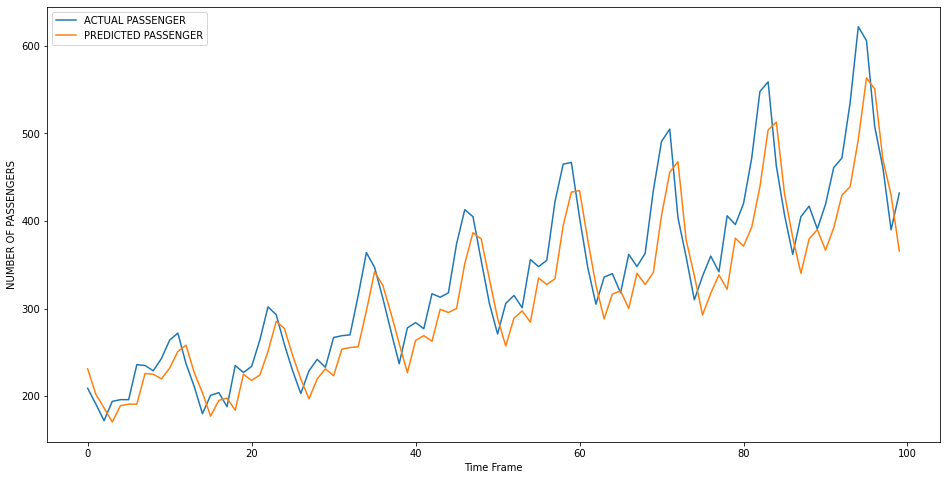

In [24]:
#--------------------------COMPARING THE ORIGNAL AND PREDICTED MODEL BELOW
plt.figure(figsize=(16,8))
plt.plot(Y_test, label = 'ACTUAL PASSENGER')
plt.plot(Predicted_Y, label = 'PREDICTED PASSENGER')
plt.ylabel('NUMBER OF PASSENGERS')
plt.xlabel('Time Frame')
plt.legend()
plt.show()

In [25]:

testScore = math.sqrt(mean_squared_error(Y_test, Predicted_Y))#-------------------THE FINAL TESTING RMSE COMES HERE without min max scaling
print('Test Score: %.2f RMSE' % (testScore))


Test Score: 43.80 RMSE


In [26]:
Y_test = Data_scale.fit_transform(Y_test)
Predicted_Y = Data_scale.fit_transform(Predicted_Y)
testScore = math.sqrt(mean_squared_error(Y_test, Predicted_Y))#-------------------THE FINAL TESTING RMSE COMES HERE after min max scaling
print('Test Score: %.2f RMSE' % (testScore))


Test Score: 0.09 RMSE
